# For latest model with dropout comparison

In [5]:
from data_analysis_utils import *
from torch.utils.data import DataLoader
import torch
import math

normalization_factors = [1818.924305707929,812.4360915904457,2.103676058906103,0.2738320630129381,0.011254956383613499,1.8125684241339823]

# # Cartesian Transform
# def spher_to_cart(label):
#     r,gamma,phi = label



#     x = np.asarray(r)*np.cos(np.asarray(gamma))*np.sin(np.asarray(phi))
#     y = np.asarray(r)*np.sin(np.asarray(gamma))*np.sin(np.asarray(phi))
#     z = np.asarray(r)*np.cos(np.asarray(phi))

#     new_label = x,y,z

#     return new_label

target_transform = None

# normalization_factors = normalization_factors
album_path = '/data/i3store/users/ssued/albums/RNO_album_11_03_2025_20k_unorm/album_RNO4_train.hdf5'
data_set = AlbumDataset(album_path, transform=None, target_transform=target_transform,normalize_labels=True, normalization_factors=normalization_factors)
data_loader = DataLoader(dataset = data_set, batch_size =1, shuffle = True)

for x,y in data_set:
    print(y)
    break

# Initialize model (The one below this ipynb block)
checkpoint_path = '/data/condor_shared/users/ssued/machine_learning/vertices_RNO4/model_cutoff_dataset_unnorm_labels/experiments/exp_e100000000_bn128_tr495_te124_lfn-MSELoss_opt-Adam_hiddenu-32_lr-0.001_lReLU-True_extra_conv_layer_batchnorm-False_dropout-111/checkpoints/checkpoint_e1500.pth'

model = RNO_four_1_1_1s_dropout_extraconv_leaky(input_shape=1,
                          hidden_units=32, 
                          output_shape=3,
                          num_epochs=1,
                          batch_size=1,
                          num_train_batches=1
                         )

model = torch.compile(model)

checkpoint = torch.load(checkpoint_path)
model.load_state_dict(checkpoint['model_state_dict'])

normalization_factors = data_set.get_normalization_factors()


Utilizing inputted normalization statistics
  r:     mean=1818.9243, std=812.4361
  theta: mean=2.1037, std=0.2738
  phi:   mean=0.0113, std=1.8126
[1818.924305707929,812.4360915904457,2.103676058906103,0.2738320630129381,0.011254956383613499,1.8125684241339823]
tensor([ 0.2663, -0.3012,  0.1786])


Looping through event: (499/500)

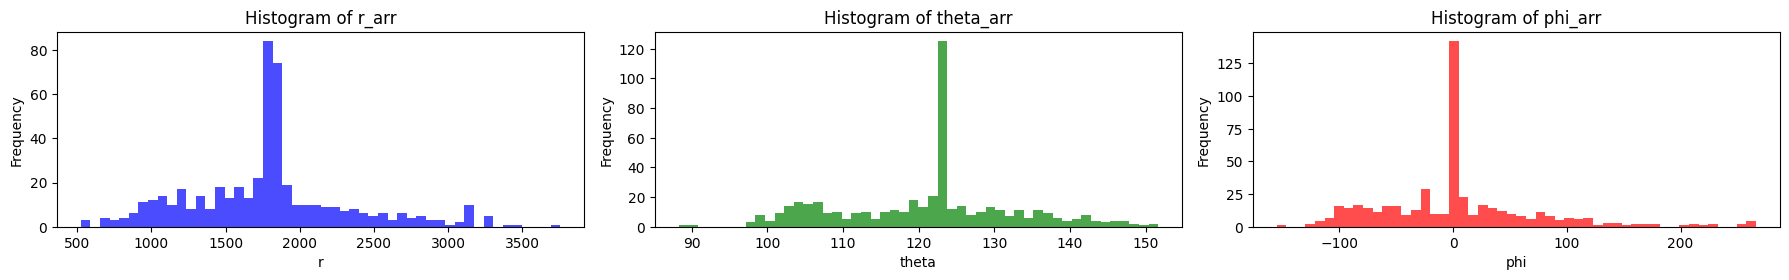

In [6]:
EVENT_NUM = 500
analytics = run_data_analysis(model,data_set,data_loader,max_event_num=EVENT_NUM)

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(18, 5))

plt.subplot(2, 3, 1)
plt.hist(analytics.radius_guess, bins=50, alpha=0.7, color='blue')
plt.title('Histogram of r_arr')
plt.xlabel('r')
plt.ylabel('Frequency')

plt.subplot(2, 3, 2)
plt.hist(np.rad2deg(analytics.theta_guess), bins=50, alpha=0.7, color='green')
plt.title('Histogram of theta_arr')
plt.xlabel('theta')
plt.ylabel('Frequency')

plt.subplot(2, 3, 3)
plt.hist(np.rad2deg(analytics.phi_guess), bins=50, alpha=0.7, color='red')
plt.title('Histogram of phi_arr')
plt.xlabel('phi')
plt.ylabel('Frequency')
plt.tight_layout();

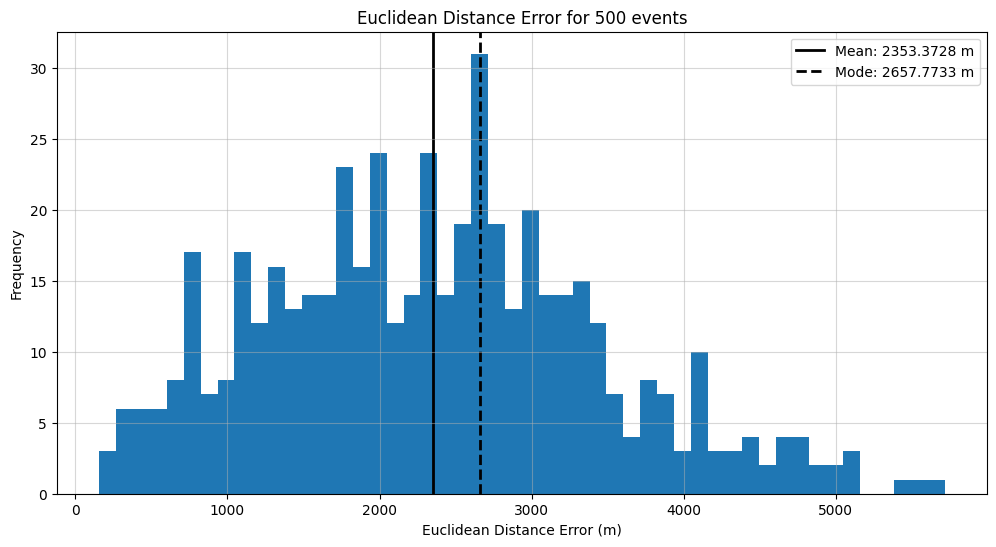

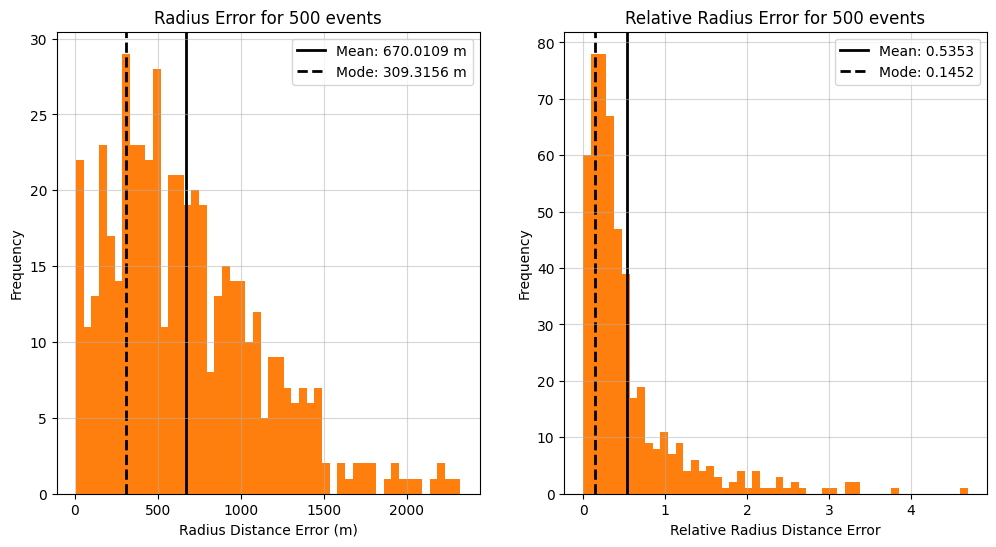

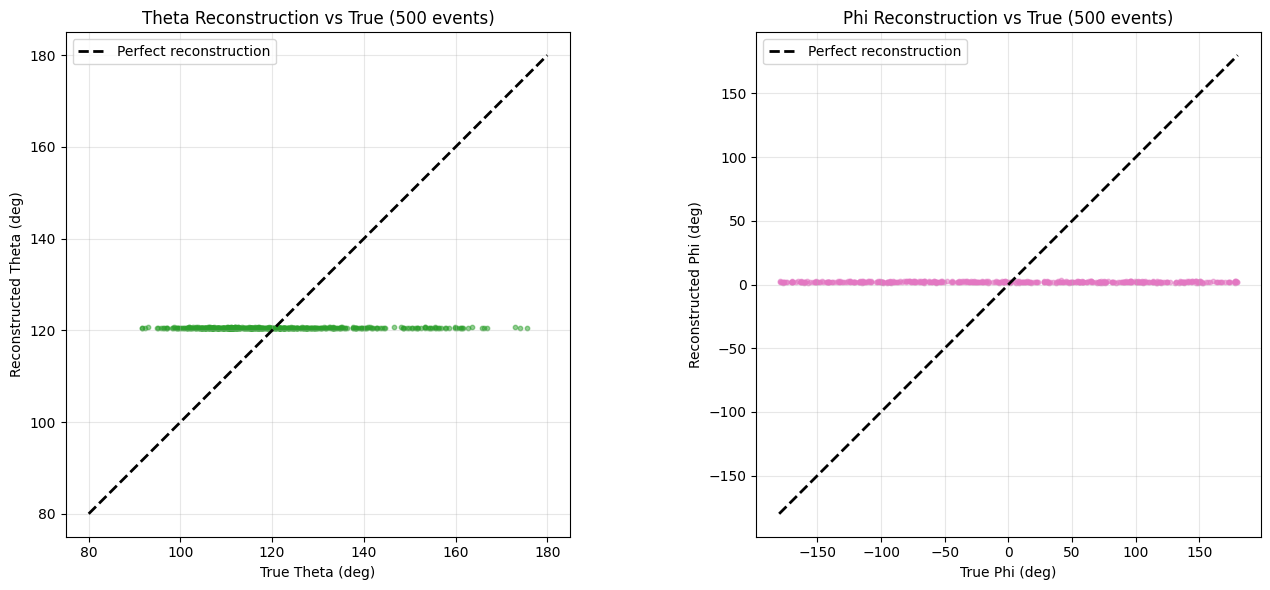

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def plot_model_analysis(analytics,event_num,distance=True,radius=True,theta=True,phi=True,thetavsphi=True,degrees=True):

    if degrees:
        unit = 'deg'
    else:
        unit = 'rad'

    if distance:
        data = analytics.euclidean_distance_error
        mean = np.mean(data)
        plt.figure(figsize=(12,6))
        plt.title(f'Euclidean Distance Error for {event_num} events')
        counts = plt.hist(data,zorder=0,bins=50)
        max_freq = np.max(counts[0])
        max_index = max(range(len(counts[0])), key=counts[0].__getitem__)
        mode = (counts[1][max_index]+counts[1][max_index+1])/2
        plt.axvline(mean,0,max_freq,label=f'Mean: {mean:.4f} m',color='black',lw=2,zorder=1)
        plt.axvline(mode,0,max_freq,label=f'Mode: {mode:.4f} m',color='black',ls='--',lw=2,zorder=1)
        plt.xlabel('Euclidean Distance Error (m)')
        plt.ylabel('Frequency')
        plt.grid(True,alpha=0.5)
        plt.legend()
        plt.show()

    if radius:
        color = 'tab:orange'
        plt.figure(figsize=(12,6))
        ax1 = plt.subplot(1,2,1)
        data = analytics.radius_error
        mean = np.mean(data)
        plt.title(f'Radius Error for {event_num} events')
        counts = ax1.hist(data,zorder=0,bins=50,color=color)
        max_freq = np.max(counts[0])
        max_index = max(range(len(counts[0])), key=counts[0].__getitem__)
        mode = (counts[1][max_index]+counts[1][max_index+1])/2
        plt.axvline(mean,0,max_freq,label=f'Mean: {mean:.4f} m',color='black',lw=2,zorder=1)
        plt.axvline(mode,0,max_freq,label=f'Mode: {mode:.4f} m',color='black',ls='--',lw=2,zorder=1)
        ax1.set_xlabel('Radius Distance Error (m)')
        ax1.set_ylabel('Frequency')
        ax1.grid(True,alpha=0.5)
        ax1.legend()

        ax2 = plt.subplot(1,2,2)
        data = analytics.rel_radius_error
        mean = np.mean(data)
        plt.title(f'Relative Radius Error for {event_num} events')
        counts = ax2.hist(data,zorder=0,bins=50,color=color)
        max_freq = np.max(counts[0])
        max_index = max(range(len(counts[0])), key=counts[0].__getitem__)
        mode = (counts[1][max_index]+counts[1][max_index+1])/2
        plt.axvline(mean,0,max_freq,label=f'Mean: {mean:.4f}',color='black',lw=2,zorder=1)
        plt.axvline(mode,0,max_freq,label=f'Mode: {mode:.4f}',color='black',ls='--',lw=2,zorder=1)
        ax2.set_xlabel('Relative Radius Distance Error')
        ax2.set_ylabel('Frequency')
        ax2.grid(True,alpha=0.5)
        ax2.legend()
        plt.show()

    if thetavsphi:
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))
        
        # Theta reconstructed vs true
        color = 'tab:green'
        ax1 = axes[0]
        theta_true = analytics.theta_target  # Adjust attribute name as needed
        theta_reco = analytics.theta_guess  # Adjust attribute name as needed
        if degrees:
            theta_true = np.rad2deg(theta_true)
            theta_reco = np.rad2deg(theta_reco)
        
        ax1.scatter(theta_true, theta_reco, alpha=0.5, s=10,color=color)
        ax1.plot([80,180], 
                 [80,180], 
                 '--',color='black', lw=2, label='Perfect reconstruction')
        ax1.set_xlabel(f'True Theta ({unit})')
        ax1.set_ylabel(f'Reconstructed Theta ({unit})')
        ax1.set_title(f'Theta Reconstruction vs True ({event_num} events)')
        ax1.grid(True, alpha=0.3)
        ax1.legend()
        ax1.set_aspect('equal', adjustable='box')
        
        # Phi reconstructed vs true
        color = 'tab:pink'
        ax2 = axes[1]
        phi_true = analytics.phi_target  # Adjust attribute name as needed
        phi_reco = analytics.phi_guess  # Adjust attribute name as needed
        if degrees:
            phi_true = np.rad2deg(phi_true)
            phi_reco = np.rad2deg(phi_reco)
        
        ax2.scatter(phi_true, phi_reco, alpha=0.5, s=10,color=color)
        ax2.plot([-180, 180], 
                 [-180, 180], 
                 '--',color='black', lw=2, label='Perfect reconstruction')
        ax2.set_xlabel(f'True Phi ({unit})')
        ax2.set_ylabel(f'Reconstructed Phi ({unit})')
        ax2.set_title(f'Phi Reconstruction vs True ({event_num} events)')
        ax2.grid(True, alpha=0.3)
        ax2.legend()
        ax2.set_aspect('equal',adjustable='box')
        
        plt.tight_layout()
        plt.show()
    else:
        if theta:
            color = 'tab:pink'
            plt.figure(figsize=(12,12))
            ax1 = plt.subplot(2,1,1)
            data = np.rad2deg(analytics.theta_error)
            mean = np.mean(data)
            plt.title(f'Theta Error for {event_num} events')
            counts = ax1.hist(data,zorder=0,bins=50,color=color)
            max_freq = np.max(counts[0])
            max_index = max(range(len(counts[0])), key=counts[0].__getitem__)
            mode = (counts[1][max_index]+counts[1][max_index+1])/2
            plt.axvline(mean,0,max_freq,label=f'Mean: {mean:.4f} {unit}',color='black',lw=2,zorder=1)
            plt.axvline(mode,0,max_freq,label=f'Mode: {mode:.4f} {unit}',color='black',ls='--',lw=2,zorder=1)
            ax1.set_xlabel(f'Theta Distance Error ({unit})')
            ax1.set_ylabel('Frequency')
            ax1.grid(True,alpha=0.5)
            ax1.legend()

        if phi:
            color = 'tab:green'
            ax2 = plt.subplot(2,1,2,sharex=ax1)
            data = np.rad2deg(analytics.phi_error)
            mean = np.mean(data)
            plt.title(f'Phi Error for {event_num} events')
            counts = ax2.hist(data,zorder=0,bins=50,color=color)
            max_freq = np.max(counts[0])
            max_index = max(range(len(counts[0])), key=counts[0].__getitem__)
            mode = (counts[1][max_index]+counts[1][max_index+1])/2
            plt.axvline(mean,0,max_freq,label=f'Mean: {mean:.4f} {unit}',color='black',lw=2,zorder=1)
            plt.axvline(mode,0,max_freq,label=f'Mode: {mode:.4f} {unit}',color='black',ls='--',lw=2,zorder=1)
            ax2.set_xlabel(f'Phi Distance Error ({unit})')
            ax2.set_ylabel('Frequency')
            ax2.grid(True,alpha=0.5)
            ax2.legend()
            plt.tight_layout()
            plt.show()



plot_model_analysis(analytics,EVENT_NUM)